In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
train_df = pd.read_csv("data_train.csv",index_col=0)
test_df = pd.read_csv("data_test.csv", index_col=0)

In [3]:
test_df.head()

,id,vas_id,buy_time
0,3130519,2.0,1548018000
1,2000860,4.0,1548018000
2,1099444,2.0,1546808400
3,1343255,5.0,1547413200
4,1277040,2.0,1546808400


In [4]:
train_df.head()

,id,vas_id,buy_time,target
0,540968,8.0,1537131600,0.0
1,1454121,4.0,1531688400,0.0
2,2458816,1.0,1534107600,0.0
3,3535012,5.0,1535922000,0.0
4,1693214,1.0,1535922000,0.0


In [5]:
train_df.shape

(831653, 4)

In [6]:
# columns = np.arange(3,256)
# small_dtype = {}
# for item in columns:
#     small_dtype[item] = np.float32
# features_df = pd.read_csv("features.csv",sep="\t", index_col=0, dtype=small_dtype)
# features_df.head()

In [7]:
# features_df.to_pickle("./features.pkl")

In [8]:
# features_df = pd.read_pickle("./features.pkl")
# features_df.memory_usage(deep=True)

In [9]:
# features_df["252"].value_counts()

In [10]:
# train_and_test = list(set(train_df.id.to_list() + test_df.id.to_list()))

In [11]:
# features_train_and_test = features_df.loc[features_df.id.isin(train_and_test),:]

In [12]:
# features_train_and_test.to_pickle("./features_train_and_test.pkl")

In [13]:
# features_df = features_df.loc[features_df["252"].isin([0,1]),:]

In [14]:
# features_df["id"] = features_df["id"].astype("int8")
# features_df["buy_time"] = features_df["buy_time"].astype("int8")

In [15]:
# features_df.memory_usage(deep=True)

In [16]:
features_train_and_test = pd.read_pickle("./features_train_and_test.pkl")

In [17]:
train_complete = train_df.merge(features_train_and_test, on=["id", "buy_time"])

In [18]:
# corr_matrix = train_df.corr()
# corr_matrix = np.round(corr_matrix,2)
# corr_matrix[np.abs(corr_matrix) < 0.3] = 0

In [19]:
# plt.figure(figsize=(15,10))
# sns.set(font_scale=1.4)
# sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

# plt.title('Correlation matrix');

In [20]:
# X = features_df.drop("252", axis=1)
# y = features_df["252"]

In [21]:
# print("ID уникален? {}".format(X.index.is_unique))
# print("Сколько дубликатов? {}".format(X.duplicated().sum()))
# print("Каков процент пропусков? {} ".format((X.isnull().sum() > 0).sum()/X.shape[1]*100))

In [22]:
X = train_complete.drop("target", axis=1)
y = train_complete["target"]

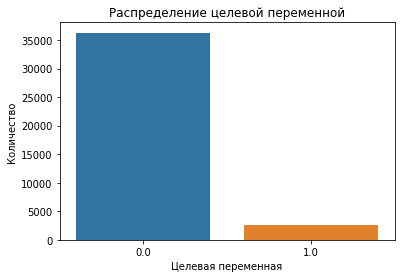

In [23]:
import seaborn as sns
ax = sns.countplot(y)
ax.set_xlabel("Целевая переменная")
ax.set_ylabel("Количество")
ax.set_title("Распределение целевой переменной");

In [24]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

train_idx, test_idx = train_test_split(X.index, test_size=0.3, random_state=RANDOM_STATE)

y_train, y_test = y.loc[train_idx], y.loc[test_idx]
X_train, X_test = X.loc[train_idx], X.loc[test_idx]

print("Train")
print(y.loc[train_idx].value_counts()/train_idx.shape[0])
print()
print("Test")
print(y.loc[test_idx].value_counts()/test_idx.shape[0])

Train
0.0    0.931248
1.0    0.068752
Name: target, dtype: float64

Test
0.0    0.934138
1.0    0.065862
Name: target, dtype: float64


In [25]:
scaler = StandardScaler()

In [26]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
#from sklearn.model_selection import cross_validate

In [28]:
#log_reg_step = ("logistic_regression", LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1, class_weight="balanced"))

In [29]:
#base_estimator = Pipeline([log_reg_step])

In [30]:
# def run_cv(estimator, X, y, scoring='f1', model_name=""):
#     cv_res = cross_validate(estimator, X, y, scoring=scoring, n_jobs=-1)
#     print("{} {}={:.2f}(+/-{:.4f})".format(model_name, scoring, cv_res['test_score'].mean(), cv_res['test_score'].std() *2))

In [31]:
# run_cv(base_estimator, X_train_scale, y_train, model_name="Baseline")

In [32]:
# base_estimator.fit(X_train_scale, y_train)

In [33]:
# base_preds = base_estimator.predict_proba(X_test_scale)[:,1]

In [34]:
from sklearn.metrics import classification_report

In [35]:
# print(classification_report(y_test, base_preds > 0.5))

In [41]:
def train_model(model, X_train, y_train, X_valid, y_valid, feature_names):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    
    #print("F1 Score: {}".format(np.round(f1_score(y_valid, y_pred, average='macro'),2)))
    print("-------------------------------------------")
    print(classification_report(y_valid, y_pred > 0.5))
    print("-------------------------------------------")
    print(pd.DataFrame(model.coef_, columns=feature_names, \
                       index=["weight"]).T.sort_values(by="weight", ascending=False).head(20))

In [37]:
balanced_log_reg = LogisticRegression(random_state=RANDOM_STATE, n_jobs=-1, class_weight="balanced")

### Linear Regression with Balanced Class Weight

In [38]:
train_model(balanced_log_reg, X_train_scale, y_train, X_test_scale, y_test, X_train.columns)

F1 Score: 0.56
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.98      0.73      0.84     10907
         1.0       0.17      0.79      0.28       769

    accuracy                           0.74     11676
   macro avg       0.58      0.76      0.56     11676
weighted avg       0.93      0.74      0.80     11676

-------------------------------------------
          weight
vas_id  1.249827
88      0.673431
167     0.501514
10      0.470373
137     0.370363
138     0.349354
84      0.343908
101     0.323728
31      0.305405
122     0.270980
45      0.221669
230     0.221082
199     0.215506
83      0.200006
6       0.180312
12      0.163154
176     0.158609
173     0.150437
169     0.129022
129     0.120112
